# Rapport du challenge du cours SD210

Autheur: Rui SONG

<p>Ce notebook contients le rapport du challenge du cours SD210.</p>
<p>La méthode retenue à la fin est un Bagging Classifieur combinant 200 Multi-layer Perceptron (MLP) classifieurs. 
Le code pour le classifeur retenue finale est dans le fichier: <b>Final.ipynb</b>. 
Et le meilleur score obtenu est 0.125235404896 (18 ème position). </p>

## 1. Investigation des données

Avant de passer les données aux classifiers, on va d'abord explorer les variables explicatives des données d'apprentisage (training data) pour déterminer si elles ont besoin de preprocessing et si oui quel type de preprocessing. On a utilisé l'ACP et le pourcentage d'inertie (l'attribut 'pca.explained_varianceratio') qui représente le pourcentage de variance expliqué par chacun des composants sélectionnés pour détérminer le nombre de varaibles explicatives à garder.

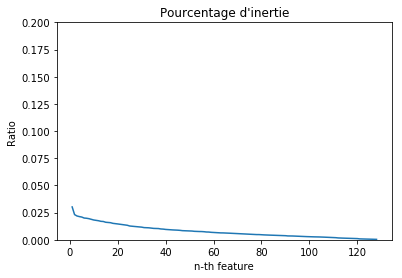

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

X_train_fname = 'training_templates.csv'
y_train_fname = 'training_labels.txt'
X_test_fname  = 'testing_templates.csv'
X_train = pd.read_csv(X_train_fname, sep=',', header=None).values
X_test  = pd.read_csv(X_test_fname,  sep=',', header=None).values
y_train = np.loadtxt(y_train_fname, dtype=np.int)

X_train = preprocessing.scale(X_train)
pca = PCA()  
PCA_X = pca.fit_transform(X_train)
ratio = pca.explained_variance_ratio_

plt.figure(1)
fig, ax = plt.subplots()
ax.set_title('Pourcentage d\'inertie')
ax.plot(np.linspace(1, ratio.shape[0], num=ratio.shape[0]), ratio)
ax.set_xlabel("n-th feature")
ax.set_ylabel("Ratio")
plt.ylim(0, 0.2)
plt.show()

Comme l'on peut voir dans le graphe ci-dessus, le pourcentage d'inertie diminue prèsque linéairement. Donc il faut mieux garder tous les variables explicatives.

## 2. Selection de classifieurs et de hyperparamètres

Dans ce secteur, on va parler de tous les classifiers que l'on a essayé d'utiliser ainsi que les hyperparamètres que l'on a joué pendant GridSearch pour atteindre une meilleure performance.

### 2.1 Logistic Regression

La régression logistique est un modèle linéaire de classifier au lieu de régression. 
La liste de hyperparamètres que l'on a joués pendant le processus de GridSearch est indiquée comme ci-dessus:

<b>(a) solver: </b> 
Les solvers implementés dans la classe de LogisticRegression sont: “liblinear”, “newton-cg”, “lbfgs” and “sag“. Le solver "liblinear" utilise un algorithme de descente de coordonnées (CD). Les solvers “lbfgs”, “sag” and “newton-cg” ne supportent que la pénalité L2 et convergent plus rapidement pour certaines données de dimensions élevées. Mais pour notre cas, "liblinear" obtient une meilleure performance selon le résultat de GridSearch et validation croisée.

<b>(b) C: </b>
L'inverse de la force de régularisation. Comme pour SVM, les valeurs de C plus petites spécifient une régularisation plus forte.

<p>Le résultat d'un LogisticRegression n'est pas satisfaisant puisque evidement la prédiction du genre d'une personne à partir de sa photo n'est pas un modèle linéaire.</p>

### 2.2 Naive Bayes

<p>Les méthodes Naive Bayes sont un ensemble d'algorithmes d'apprentissage supervisés basés sur l'application du théorème de Bayes avec l'hypothèse «naïve» d'indépendance entre chaque paire de fonctionnalités. </p>
<p>Ce type de classifier n'est évidement pas adapté à notre cas. Parmi les trois types de Naive Bayes classifiers implémentés par sklearn, on n'a choisi le Gaussian Naive Bayes (GaussianNB), et le résultat obtenu n'est pas très satisfaisant.</p>

### 2.3 AdaBoost Classifier

<p>Le principe de base d'AdaBoost est de s'adapter à une séquence de classifieurs faibles (c'est-à-dire des modèles qui ne sont que légèrement mieux que les hypothèses aléatoires, comme les arbres de décision) sur des versions modifiées à plusieurs reprises des données. Les prédictions de tous les classifieurs faibles sont ensuite combinées par un vote majoritaire pondéré (ou somme) pour produire la prédiction finale. </p>
<p>Pour ce classifier, on a utilisé l'estimateur de base par défault.</p>

<p>Le résultat obtenu par AdaBoost Classifier n'est pas très satisfaisant, les probablités prédictées sont toutes environ 0,5. </p>

### 2.4 GradientBoosting Classifier

<p>GradientBoosting construit un modèle additif de manière étape par étape; Il permet l'optimisation de fonctions de perte différentiables arbitraires.</p>

<p>Pour ce classifier, on a utilisé l'estimateur de base par défault, et la liste de hyperparamètres que l'on a joué pendant le processus de GridSearch est indiquée comme ci-dessous:</p>

<b>(a) n_estimators:</b>

Le nombre d'étapes de boosting à effectuer. L'augmentation progressive du gradient est assez robuste pour sur-apprentisage, de sorte qu'un grand nombre d'estimateurs entraîne généralement de meilleures performances. Le résultat de GridSearch a aussi prouvé que la perfomance de validation croisée d'un grand nombre d'estimateurs surpasse celle d'un petit nombre (n_estimators = 1000 au lieu de 100 ou 10).

<b>(b) max_features:</b>

Le nombre de features à considérer lors de la recherche de la meilleure split pour un arbre de regression.

<b>(c) learning_rate:</b>

Le taux d'apprentissage (learning rate) réduit la contribution de chaque classificateur par learning_rate. Il existe un compromis entre les niveaux d'apprentissage et les n_estimateurs

En utilisant le meilleur classifieur trouvé par GridSearch, le score est très bien pour les données d'apprentissage (training data) mais pas satisfaisant pour le test, c'est à dire, ce classifieur a un problème de sur-apprentisage.

### 2.5 SVM

<p>SVM est un classifieur que l'on a vu dans le cours. Comme le temps pour entraîner un classifieur SVM est très longue, on ne peut que mettre de côté $\frac{2}{3}$ de données d'apprentisage (training data) pendant le processus de GridSearch pour trouver les paramètres. </p>
<p>Le résultat obtenu par SVM est assez satisfaisant (environs 0.15), mais le temps requis pour entraîner un classifieur SVM peut restreindre l'utilisation de SVM. </p>

### 2.6 Random Forests

Les forêts aléatoires (random forests) sont aussi un classifieur que l'on a vu dans ce cours. Bien que les forêts aléatoires soient souvent le champoin de chanllenges, on n'a pas réussi à trouver un classifieur de forêts aléatoires avec une performance assez satisfaisante.

### 2.7 Neural Network (sklearn)

<p>Un classifier de réseau neuronal supporté par sklearn le classifier Perceptron multicouche (Multi-layer Perceptron classifier). </p>

<p>Un perceptron multicouches (MLP) est un modèle de réseau neuronal artificiel qui mappe les ensembles de données d'entrée sur un ensemble de sorties appropriées. Un MLP consiste en plusieurs couches de nœuds dans un graphe dirigé, chaque couche étant entièrement connectée à la suivante. Sauf pour les nœuds d'entrée, chaque nœud est un neurone avec une fonction d'activation non linéaire.</p>

<p>Comme le classifier MLP ont une performance très satisfaisante pour notre challenge, on a fait de nombreuses explorations d’approfondissement sur ce classifier. La liste de hyperparamètres que l'on a joué pendant le processus de GridSearch est indiquée comme ci-dessous:</p>

#### (a) hidden_layer_sizes

<p>Pour un classifier MLP, le nombre de neurones d'entrées est le nombre de variables explicatives de données, et le nombre de neurones de sortie est 1, donc on peut seulement faire changer le nombre de couches cachées (hidden layer) et le nombre de neurones pour chaque couche cashée. Le ième élément de hidden_layer_sizes représente le nombre de neurones dans la ième couche cachée.</p>

<p>On a essaiyé de nombreux hidden_layer_sizes différents: (128,),(256,),(512,),(1024,), etc, pour le cas d'une couche cachée; (128,64),(128,256), etc, pour le cas de deux couches cachées; (128,128,128),(256,256,256), etc, pour le cas de trois couches cachées. Le résultat s'avère que la performance de différents hidden_layer_sizes ne diffère pas beaucoup en combinant un alpha approprié tant que le structure de couches cachées est similaire</p>

#### (b) activation

<p>La fonction d'activation pour les couches cachées. 
La fonction d'activation contrôle la non-linéarité des neurones individuels et le moment pour terminer. </p>
<p>Pour un MLP de sklearn, on ne peut seulement choisir qu'une même fonction d'activation pour tous les couches cachées. Au vue de résultats de GridSearch et validation croisée, la performance de fonction 'relu' surpasse celles d'autres pour notre challenge.</p>

#### (c) solver

<p>Le solveur pour l'optimisation du poids.</p>

<p>Le solveur SGD (Stochastic gradient descent) est le plus étudié solveur parmi les autres solveurs supportés par sklearn. L'algorithme de sgd est intuitif. La vitesse de convergence de sgd depend beaucoup du taux d'apprentisage (learning rate). Et on peut facilement trouver un minimum local en utilisant sgd.</p>

<p>Le solveur Adam (Adaptive Moment Estimation) est une méthode qui calcule les taux d'apprentissage adaptatifs pour chaque paramètre. En plus de stocker une moyenne exponentiellement en décomposition des gradients carrés précédents, Adam conserve également une moyenne exponentiellement en décomposition des gradients précédents, similaire à le momentum.</p> 

<p>Adam est plus rapide que SGD et le résultat de GridSearch et validation croisée s'avère que Adam obtient aussi une preformance meilleure que SGD.</p>

#### (d) alpha

<p>Paramètre de pénalisation pour la pénalité L2. Différents valeurs d'alpha peut avoir une grande influence sur la performance. Au vue de résultats de GridSearch et validation croisée, la valeur d'alpha augemente quand le nombre de couchés cachées augemente.</p>

### 2.8 Neural Network (Keras)

<p>Du fait qu'il y a des contraintes de MLP supporté par sklearn, on a fait des premières tentatives d'utiliser un autre module de Python: Keras. Keras est une bibliothèque d'apprentissage en profondeur (deep learning) Python qui offre un accès facile et pratique aux puissantes bibliothèques numériques Theano et TensorFlow. Pour profiter la fonction de GridSearch de sklearn et régler les hyperparamètres des modèles de Keras, la bibliothèque Keras fournit une enveloppe pratique à utiliser comme estimateurs de classifiers dans sklearn. </p>

<p>La liste de hyperparamètres que l'on a joué est indiquée comme ci-dessous:</p>

#### (a) Epochs

Une des différences entre sklearn et Keras est que, l'apprentissage de classifier de sklearn termine quand la perte de deux epochs consécutif n'améliore pas mais celui de Keras termine quand un nombre maximum d'epochs est atteint.

#### (b) Fonction d'activation

En utilisant Keras, on peut choisir des différentes fonctions d'activation pour différente couche.

#### (c) Dropout

Dropout est une technique de régularisation simple et puissante pour les réseaux de neurones et les modèles d'apprentissage en profondeur (deep learning). C'est une technique où des neurones sélectionnés au hasard sont ignorés pendant l'entraînement.

### 2.9 Bagging

<p>Bagging est un classifier que l'on a vu en cours, qui s'adapte aux classifiers de base chacun sur des sous-ensembles aléatoires de données d'origine, puis agrège leurs prédictions individuelles pour former une prédiction finale</p>

<p>En combinant des MLPClassifiers par Bagging, on a obtenu les meilleures performances par rapport aux autres classifiers que l'on a essayé de jouer. Mais un seule MLPClassifier dont performance surpasse les autres ne guarantie pas une performance aussi satifaisante quand il est combiné dans un classifier Baggings. Généralement, la valeur d'alpha de MLPClassifier devient beaucoup plus petite si l'on veut obtenir un meilleur résultat dans Bagging. Ainsi si le nombre d'estimateurs combinés dans Baggings est assez grand, on peut diminuer le hyperparamètre 'max_features' du classifier Bagging pour obtenir un meilleur résultat.</p>

<p>Au vu que le temps pour entraîner un classifier Baggings est relativement longue, c'est pas très pratique d'utiliser GridSearch.</p>

## 3. Prédiction de 0

Génaralement, un classifier ne prédit pas une nouvelle classe qui a jamais appraître dans les données d'apprentisage (training data.). Mais prèsque tous les classifieurs de sklearn ont proposé une méthode 'predict_proba()' (sauf pour SVM, on doit d'abord mettre le hyperparamètre 'probability' à True avant l'entraînement) qui nous donne les probabilités qu'une donées soit prédit correctement. On met à zéro les prédictions qui ont une probabilité faible d'être correcte.

## 4. Conclusion

<p>Le classifier retenu à la fin un Bagging combinant 200 MLPClassifiers. Les hyperparamètres pour MLPClassifier sont:
alpha=0.000001, hidden_layer_sizes=(128,128,128), tol=0.00001, random_state=42; Les hyperparamètres pour BaggingClassifier sont: n_estimators=200,max_samples=0.4,max_features=0.7. Et le meilleur résultat obtenu est 0.125235404896 (18 ème position).</p>

<p> Ce challenge nous offre une opportunité de trouver le meilleur classifier pour un problème réel. Le processus de trouver des meilleurs hyperparamètres requiert beaucoup de travail et de patience. Mais on peut accéder aux GPU pour accélérer la formation des modèles de machine learning (surtout deep learning) en utilisant l'infrastructure Amazon Web Service (AWS).</p>